In [1]:
# === EDA: Imports & Settings ===
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (8, 5)  # Simple readable plots


In [2]:
# === Load dataset ===
DATA_PATH = Path("../data/raw/creditcard.csv")  # from notebooks/ folder
assert DATA_PATH.exists(), f"Data not found at: {DATA_PATH}"

df = pd.read_csv(DATA_PATH)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# === Basic info, shape, missing, duplicates ===
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

print("\nMissing values per column (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))

print("\nDuplicated rows:", df.duplicated().sum())


Shape: (284807, 31)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-nu

Class counts:
Class
0    284315
1       492
Name: count, dtype: int64
Fraud %: 0.1727%


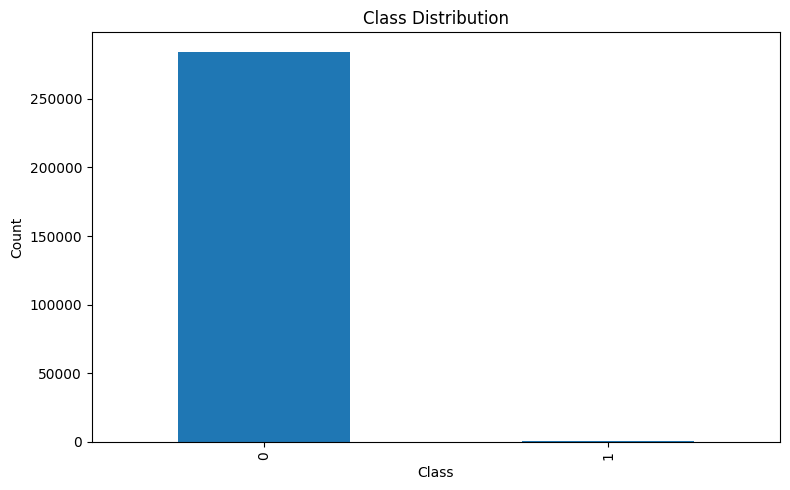

In [4]:
# === Class distribution (0: legit, 1: fraud) ===
cls_counts = df["Class"].value_counts().sort_index()
fraud_pct = 100 * cls_counts.get(1, 0) / len(df)
print(f"Class counts:\n{cls_counts}\nFraud %: {fraud_pct:.4f}%")

# Plot & save
fig = plt.figure()
cls_counts.plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()

figures_dir = Path("../reports/figures")
figures_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(figures_dir / "class_distribution.png", dpi=150)
plt.show()



Amount describe:
 count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
50%          22.000000
75%          77.165000
90%         203.000000
95%         365.000000
99%        1017.970000
max       25691.160000
Name: Amount, dtype: float64


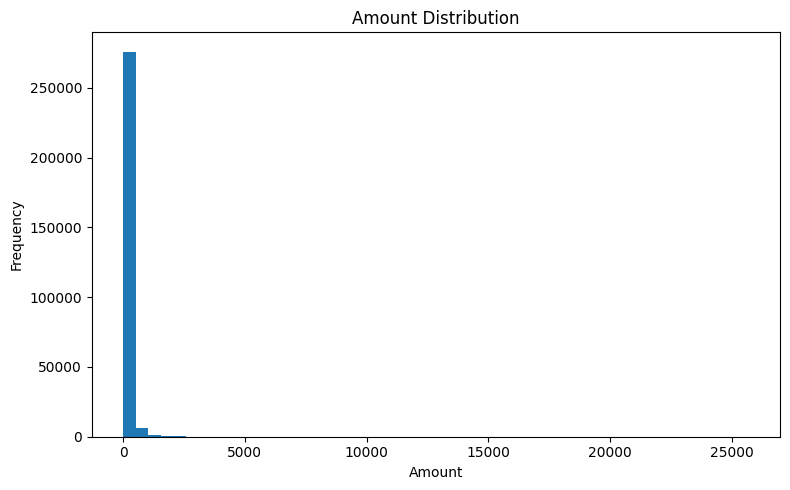


Time describe:
 count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
50%       84692.000000
75%      139320.500000
90%      157640.400000
95%      164143.400000
99%      170560.940000
max      172792.000000
Name: Time, dtype: float64


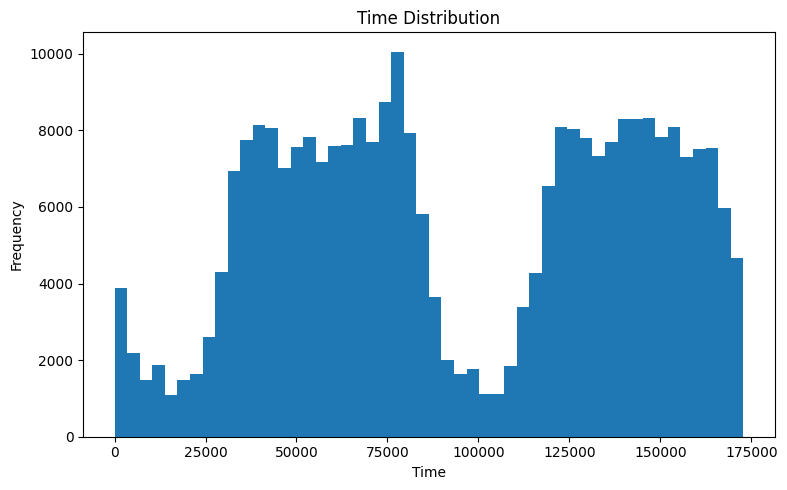

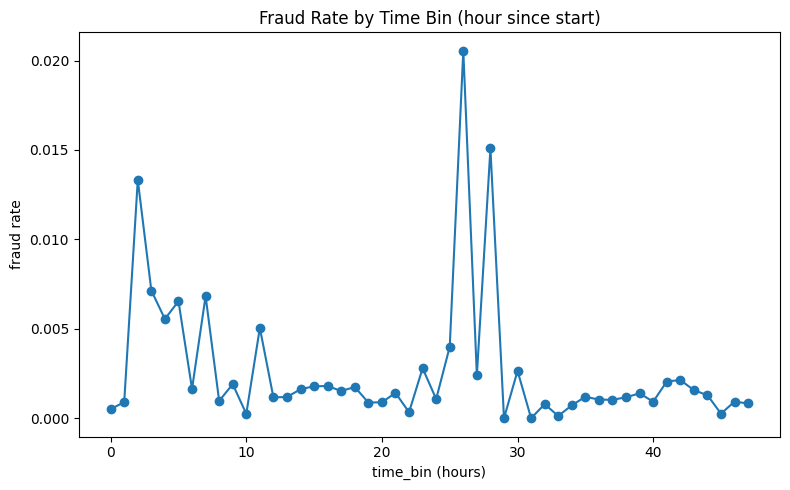

In [5]:
# === Distributions for Amount and Time ===
for col in ["Amount", "Time"]:
    if col in df.columns:
        print(f"\n{col} describe:\n", df[col].describe(percentiles=[.5,.75,.9,.95,.99]))
        fig = plt.figure()
        df[col].plot(kind="hist", bins=50)
        plt.title(f"{col} Distribution")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.savefig(figures_dir / f"{col.lower()}_hist.png", dpi=150)
        plt.show()

# Optional: fraud rate by coarse time buckets (Time is seconds since first tx, not real clock hour)
if "Time" in df.columns:
    tmp = df.copy()
    tmp["time_bin"] = (tmp["Time"] // 3600).astype(int)  # hours since first tx
    rate_by_time = tmp.groupby("time_bin")["Class"].mean()
    fig = plt.figure()
    rate_by_time.plot(kind="line", marker="o")
    plt.title("Fraud Rate by Time Bin (hour since start)")
    plt.xlabel("time_bin (hours)")
    plt.ylabel("fraud rate")
    plt.tight_layout()
    plt.savefig(figures_dir / "fraud_rate_by_time_bin.png", dpi=150)
    plt.show()


Top 15 |corr(feature, Class)|:
 V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
V7     0.187257
V11    0.154876
V4     0.133447
V18    0.111485
V1     0.101347
V9     0.097733
V5     0.094974
V2     0.091289
V6     0.043643
dtype: float64


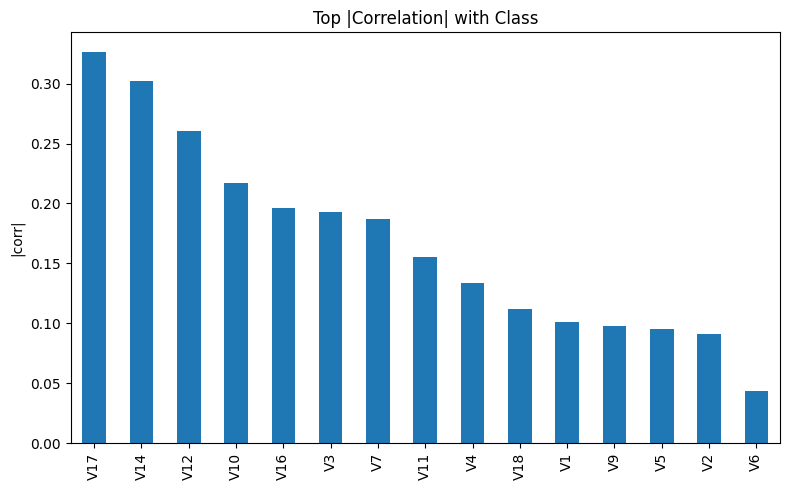

In [6]:
# === Absolute correlation of features with Class ===
# Only numeric columns will be used
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if "Class" in num_cols:
    num_cols.remove("Class")

corr_with_y = df[num_cols].corrwith(df["Class"]).abs().sort_values(ascending=False)
top_corr = corr_with_y.head(15)
print("Top 15 |corr(feature, Class)|:\n", top_corr)

# Plot & save
fig = plt.figure()
top_corr.plot(kind="bar")
plt.title("Top |Correlation| with Class")
plt.ylabel("|corr|")
plt.tight_layout()
plt.savefig(figures_dir / "top_corr_with_class.png", dpi=150)
plt.show()


Amount 95th: 365.00 | 99th: 1017.97


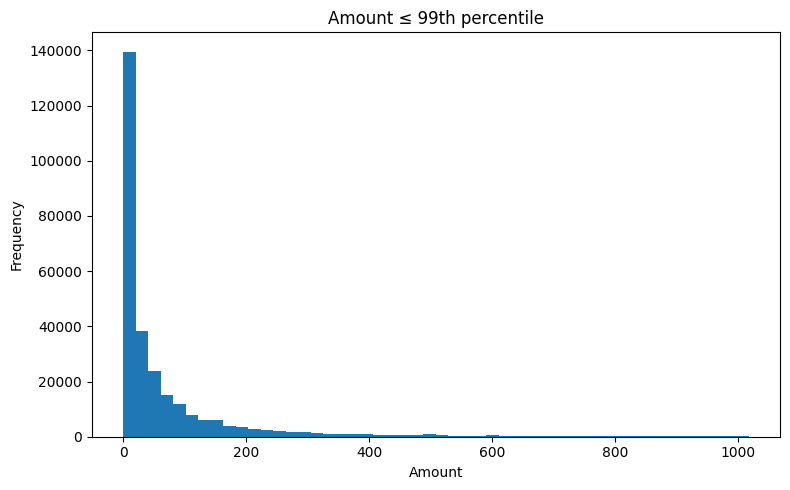

In [7]:
# === Quick outlier check on Amount ===
if "Amount" in df.columns:
    q95 = df["Amount"].quantile(0.95)
    q99 = df["Amount"].quantile(0.99)
    print(f"Amount 95th: {q95:.2f} | 99th: {q99:.2f}")

    fig = plt.figure()
    df.loc[df["Amount"] <= q99, "Amount"].plot(kind="hist", bins=50)
    plt.title("Amount ≤ 99th percentile")
    plt.xlabel("Amount")
    plt.tight_layout()
    plt.savefig(figures_dir / "amount_under_p99.png", dpi=150)
    plt.show()


In [11]:
# === Write EDA findings to reports/eda_summary.md ===
rows, cols = df.shape
frauds = int(cls_counts.get(1, 0))
legits = int(cls_counts.get(0, 0))
top_corr_str = "\n".join([f"- {k}: {v:.4f}" for k, v in top_corr.items()])

amount_99 = df["Amount"].quantile(0.99) if "Amount" in df.columns else np.nan
time_corr = corr_with_y.get("Time", np.nan) if "Time" in df.columns else np.nan

summary_md = f"""# EDA Summary

**Dataset**
- Rows: {rows:,} | Cols: {cols}
- Legit: {legits:,} | Fraud: {frauds:,}  (~{fraud_pct:.4f}% fraud)
- Missing total: {int(df.isna().sum().sum())}
- Duplicates: {int(df.duplicated().sum())}

**Key Stats**
- Amount p99: {amount_99:.2f}
- |corr(Time, Class)|: {np.nan if pd.isna(time_corr) else f'{float(time_corr):.4f}'}

**Top correlations with Class (abs):**
{top_corr_str}

**Decisions (for next step)**
1. Scale **Amount** (RobustScaler) and consider log-transform if needed.
2. **Time** usually weak → consider dropping or """